$$ R_{t, t+1}  = \frac {P_{t+1}}{P_{t}} - 1 $$

In [240]:
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
import matplotlib.pyplot as plt

In [7]:
prices = pd.DataFrame(
    {
        'Blue' : [8.7, 8.91, 8.71, 8.43, 8.73], 
        'Orange' : [10.66, 11.08, 10.71, 11.59, 12.11]
    }
)

In [8]:
prices

,Blue,Orange
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [11]:
prices.iloc[1:].values / prices.iloc[:-1] - 1

,Blue,Orange
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [13]:
prices/prices.shift(1) - 1

,Blue,Orange
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [17]:
returns = prices.pct_change()

In [18]:
returns.std()

Blue      0.033565
Orange    0.048328
dtype: float64

In [19]:
returns.mean()

Blue      0.001283
Orange    0.033260
dtype: float64

In [20]:
rd = 0.001
(1 + rd) ** 252 - 1

0.28643404437615216

### Homework

In [166]:
df = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',
                header =0, index_col = 0, parse_dates=True, na_values=-99.99)

In [167]:
df.index = pd.to_datetime(df.index, format="%Y%m")
df.index = df.index.to_period('M')

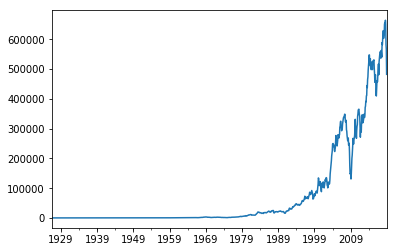

In [168]:
((df['Lo 20'] / 100) + 1).cumprod().plot()


In [169]:
df['perc_ret'] = (1 + df['Lo 20']/100).cumprod() - 1 

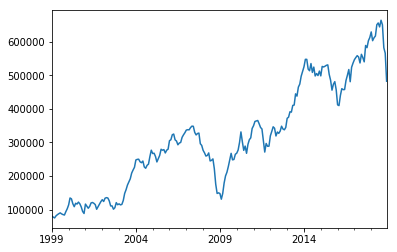

In [170]:
df.perc_ret.tail(240).plot()

In [171]:
df.shape

(1110, 20)

In [176]:
df['Lo 20']['2000':'2001']

2000-01    11.35
2000-02    18.13
2000-03    -1.95
2000-04   -11.12
2000-05    -7.43
2000-06     9.43
2000-07    -2.02
2000-08     5.01
2000-09    -4.21
2000-10    -7.98
2000-11   -12.55
2000-12    -6.33
2001-01    31.79
2001-02    -5.36
2001-03    -5.61
2001-04     5.23
2001-05     9.52
2001-06     1.14
2001-07    -2.02
2001-08    -3.29
2001-09   -12.11
2001-10     7.79
2001-11     6.79
2001-12     6.45
Freq: M, Name: Lo 20, dtype: float64

1. What was the Annualized Return of the Lo 20 portfolio over the entire period?

Enter the answer as a percentage. e.g. if your answer is 23.43% enter the number 23.43

In [204]:
round(100 *(np.prod(1+df["Lo 20"]/100) ** (12/1110)-1), 2)

15.2

2. What was the Annualized Volatility of the Lo 20 portfolio over the entire period? 

Enter the answer as a numeric to one decimal place, as a percentage. e.g. if your answer is 23.43% enter the number 23.4

In [205]:
round(df["Lo 20"].std()*(np.sqrt(12)), 2)

33.67

3. What was the Annualized Return of the Hi 20 portfolio over the entire period?

Enter the answer as percentage. e.g. if your answer is 23.43% enter the number 23.43

In [206]:
round(100 * (np.prod(1 + df["Hi 20"]/100) ** (12/1110) - 1), 2)

9.85

4. What was the Annualized Volatility of the Hi 20 portfolio over the entire period ?

Enter the answer as percentage. e.g. if your answer is 23.43% enter the number 23.43

In [207]:
round(df["Hi 20"].std()*(np.sqrt(12)), 2)

19.51

5. What was the Annualized Return of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)?

In [189]:
len(df["Lo 20"]['1999':'2015'])

In [198]:
rets_Lo20_mask = df["Lo 20"]['1999':'2015']

In [190]:
len(rets_Lo20_mask)

204

In [208]:
round(100 * (np.prod((1 + rets_Lo20_mask/100)) ** (12/204) - 1), 2)

11.44

6. What was the Annualized Volatility of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)? 

In [213]:
round(rets_Lo20_mask.std() * np.sqrt(12), 2)

22.89

7. What was the Annualized Return of the Hi 20 portfolio over the period  1999 - 2015 (both inclusive)?

In [214]:
rets_Hi20_mask = df["Hi 20"]['1999':'2015']
len(rets_Hi20_mask)

204

In [215]:
round(100 * (np.prod((1 + rets_Hi20_mask/100)) ** (12/204) - 1), 2)

6.29

8. What was the Annualized Volatility of the Hi 20 portfolio over the period 1999 - 2015 (both inclusive)? 

Enter the answer as a percentage. e.g. if your answer is 23.43% enter the number 23.43

In [216]:
round(rets_Hi20_mask.std() * np.sqrt(12), 2)

17.27

9. What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the SmallCap (Lo 20) portfolio?

Enter the answer as a percentage. e.g. if your answer is 23.43% enter the number 23.43

In [244]:
import risk_kit as rk

In [266]:
round(-rk.compute_drawdown(rets_Lo20_mask/100)['Drawdowns'].min()*100, 2)

62.48

In [258]:
rk.compute_drawdown(rets_Lo20_mask/100)['Drawdowns'].idxmin()

Period('2009-02', 'M')

In [259]:
rk.compute_drawdown(rets_Lo20_mask/100)['2009'].head(12)

,Wealth,Peaks,Drawdowns
2009-01,2037.86029,4810.16401,-0.57634
2009-02,1804.72908,4810.16401,-0.62481
2009-03,2041.14859,4810.16401,-0.57566
2009-04,2469.17744,4810.16401,-0.48667
2009-05,2762.51572,4810.16401,-0.42569
2009-06,2912.24408,4810.16401,-0.39456
2009-07,3149.00952,4810.16401,-0.34534
2009-08,3426.75216,4810.16401,-0.28760
2009-09,3690.61208,4810.16401,-0.23275
2009-10,3423.78082,4810.16401,-0.28822


10. At the end of which month over the period 1999-2015 did that maximum drawdown on the SmallCap (Lo 20) portfolio occur?

Enter the answer in the format YYYY-MM. Eg for February of 2015 enter 2015-02

In [265]:
rk.compute_drawdown(rets_Lo20_mask/100)["Drawdowns"].idxmin()

Period('2009-02', 'M')

11. What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the LargeCap (Hi 20) portfolio?

In [267]:
round(-rk.compute_drawdown(rets_Hi20_mask/100)["Drawdowns"].min()*100, 2)

55.27

12. Over the period 1999-2015, at the end of which month did that maximum drawdown of the LargeCap (Hi 20) portfolio occur?

Enter the answer as YYYY-MM i.e. for February of 2015 you would enter 2015-02


In [268]:
rk.compute_drawdown(rets_Hi20_mask/100)["Drawdowns"].idxmin()

Period('2009-02', 'M')

13. For the remaining questions, use the EDHEC Hedge Fund Indices data set that we used in the lab assignment and load them into Python. Looking at the data since 2009 (including all of 2009) through 2018 which Hedge Fund Index has exhibited the highest semideviation?

In [272]:
hfi = rk.get_hfi_returns()
hfi.head(2)

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.01190,0.03930,0.01780,0.07910,0.01890,0.02130,0.01910,0.05730,0.02810,0.01500,0.01800,-0.01660,0.03170
1997-02,0.01230,0.02980,0.01220,0.05250,0.01010,0.00840,0.01220,0.01750,-0.00060,0.00340,0.01180,0.04260,0.01060


In [285]:
hfi_window= hfi["2009":"2018"]   # selection of the time window
rk.semideviation(hfi_window) #.idxmin()

Convertible Arbitrage    0.00668
CTA Global               0.01100
Distressed Securities    0.00950
Emerging Markets         0.01528
Equity Market Neutral    0.00519
Event Driven             0.01013
Fixed Income Arbitrage   0.00332
Global Macro             0.00508
Long/Short Equity        0.01214
Merger Arbitrage         0.00361
Relative Value           0.00571
Short Selling            0.02124
Funds Of Funds           0.00795
dtype: float64

In [287]:
rk.skewness(hfi_window).idxmin()

'Equity Market Neutral'

In [293]:
rk.kurtosis(hfi["2000":"2018"]) #.idxmax()

Convertible Arbitrage    23.00145
CTA Global                2.84502
Distressed Securities     6.23172
Emerging Markets          5.94129
Equity Market Neutral    20.32962
Event Driven              5.54344
Fixed Income Arbitrage   33.37873
Global Macro              3.65328
Long/Short Equity         4.47259
Merger Arbitrage          4.52078
Relative Value           12.73110
Short Selling             4.35276
Funds Of Funds            7.58472
dtype: float64

### Last 4 questions

### Max drawdown for a DataFrame